In [ ]:
# -*- coding: utf-8 -*-
"""
HW1 Code Skeleton
@author: Jianhua Ruan
"""
import random

import matplotlib.pyplot as plt
from IPython import get_ipython


# Q1 Selection Sort 

Although not required, it should be in-place sorting (sort the original list)

In [ ]:

def selectionSort(numList):
    """Given a list of numbers, return a list in sorted order (least to largest)
        Note that the function may change the original list (in-place sorting)
    """
    
##########################
# replace this block
    for j in range(len(numList)):
        minVal = j;
        for k in range(j+1, len(numList)):
            if numList[minVal] > numList[k]:
                minVal = k
        numList[j], numList[minVal] = numList[minVal], numList[j]   
##########################

    return numList


#%% Testing selection sort

a = [random.randint(0, 20) for _ in range(10)]
print('\n\n********* Q1 *********')
print('random array is: ', a)
    
b = selectionSort(a)
print('selection sorted array is: ', b)



if b == sorted(a):
    print('selectionSort is correct') 

    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'selectionSort(a)')

else:
# replace the following statement with a print statement if your selection sort is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('selectionSort is incorrect')





********* Q1 *********
random array is:  [15, 0, 15, 17, 18, 9, 10, 1, 1, 4]
selection sorted array is:  [0, 1, 1, 4, 9, 10, 15, 15, 17, 18]
selectionSort is correct
profiling running time of python sorted function on a:
200 ns ± 2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
profiling running time of my merge sort function on a:
5.77 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Q2a. Merge function

In [ ]:


def merge(sortListA, sortListB):
    """Given two non-decreasingly sorted list of numbers, 
       return a single merged list in non-decreasing order
    """
##########################
# replace this block
    #pass  
    mergedList = []
    i = j = 0
    while i < len(sortListA) and j < len(sortListB):
        if sortListA[i] <= sortListB[j]:
            mergedList.append(sortListA[i])
            #print("ML", mergedList)
            i += 1
            #j += 1
        else:
            mergedList.append(sortListB[j])
           # print("ML", mergedList)
            j += 1
            #i += 1
    while i < len(sortListA):
        mergedList.append(sortListA[i])
        i += 1
    while j < len(sortListB):
        mergedList.append(sortListB[j])
        j += 1
##########################
    return mergedList


#%% Testing merge function

a = sorted([random.randint(0, 10) for _ in range(5)]) # a is sorted 
b = sorted([random.randint(0, 10) for _ in range(4)]) # b is sorted

print('\n\n********* Q2a *********')
print('a is: ', a)
print('b is: ', b)

c = merge(a, b) # c should be sorted(a+b)
print('merged result: ', c)

if (c == sorted(a + b)):
    print('merge is correct')
else:
# replace the following statement with a print statement if your merge function is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('merge is incorrect')    






********* Q2a *********
a is:  [1, 3, 4, 5, 5]
b is:  [0, 4, 8, 8]
merged result:  [0, 1, 3, 4, 4, 5, 5, 8, 8]
merge is correct


# Q2b merge sort 

Not an in-place sorting (returns a new sorted list)

In [ ]:
def mergeSort(numList):
    """
    Given a list of numbers in random order, 
    return a new list sorted in non-decreasing order, 
    and leave the original list unchanged.
    """
##########################
# replace this block
    #pass
   # sortedList = numList #super slow? and it seems correct? is it?
   # sortedList.sort()
    if len(numList) <= 1:
        return numList
        
    mid = len(numList)// 2
    sortListA = mergeSort(numList[:mid]) #numList[:mid] #stops error this way but idk
    sortListB = mergeSort(numList[mid:]) #numList[mid:]
    sortedList = merge(sortListA, sortListB)
        #############this should be it but it isnt reading my merge
    


##########################

    return sortedList


#%% Test mergeSort function
    
    
a = [random.randint(0, 20) for _ in range(10)]
    

print('\n\n********* Q2b *********')
print('random array is: ', a)


b = mergeSort(a)
print('merge sorted array is: ', b)


if b == sorted(a):
    print('mergeSort is correct') 
    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'mergeSort(a)')

else:
# replace the following statement with a print statement if your merge sort is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('mergeSort is incorrect')








********* Q2b *********
random array is:  [10, 11, 3, 11, 14, 18, 1, 11, 16, 2]
merge sorted array is:  [1, 2, 3, 10, 11, 11, 11, 14, 16, 18]
mergeSort is correct
profiling running time of python sorted function on a:
249 ns ± 1.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
profiling running time of my merge sort function on a:
13.7 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Q3 Experiment and plot

Run the three sorting algorithms on different input sizes and collect running time

In [ ]:
import time

# input size is 500 * (1, 2, 4, ..., 32)
sizes = [500 * 2**i for i in range(6)]


merge_sort_time = [0] * len(sizes)
selection_sort_time = [0] * len(sizes)
quick_sort_time = [0] * len(sizes)

print('\n\n********* Q3 *********')
print('Collecting running time (in milliseconds)')

for i in range(len(sizes)):
    print('iteration %d, size = %d' %(i, sizes[i]))
    # random array of size sizes[i]
    a = [random.random() for _ in range(sizes[i])]
    start_time = time.perf_counter()
    sorted(a)
    quick_sort_time[i] = 1000*(time.perf_counter() - start_time) 
    start_time = time.perf_counter()
    mergeSort(a)
    merge_sort_time[i] = 1000*(time.perf_counter() - start_time) 
    start_time = time.perf_counter()
    selectionSort(a)
    selection_sort_time[i] = 1000*(time.perf_counter() - start_time)  




********* Q3 *********
iteration 0, size = 500
iteration 1, size = 1000
iteration 2, size = 2000
iteration 3, size = 4000
iteration 4, size = 8000
iteration 5, size = 16000


## Complete the following code to plot the running time; use the style show in the homework document as template, reproduce as much detail as possible.



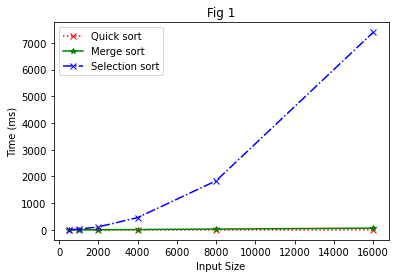

In [ ]:
#%% Q3a. plot running time (Fig 1)

##########################
# replace this block
    #pass
    #figure out plt.plot for a, start time might be wrong, markers might be x or * 
plt.figure()
plt.plot(sizes,quick_sort_time, color='red', marker='x',linestyle=':', label = "Quick sort")
plt.plot(sizes, merge_sort_time, color='green', marker='*',linestyle='solid', label = "Merge sort")
plt.plot(sizes,selection_sort_time, color='blue', marker='x',linestyle='-.', label = "Selection sort")
plt.title('Fig 1')
plt.legend()
plt.ylabel('Time (ms)')
plt.xlabel("Input Size")
plt.show()
##########################

<Figure size 432x288 with 0 Axes>

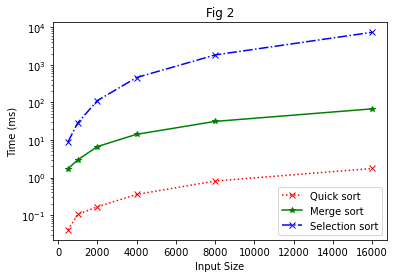

In [13]:
#%% Q3b. plot running time (Fig 2)

##########################
# replace this block
plt.clf()
plt.figure() #figure out plt.plot for a, start time might be wrong, markers might be x or *
plt.yscale('log')
plt.plot(sizes,quick_sort_time,label = 'Quick sort', color='red', marker='x',linestyle=':')
plt.plot(sizes, merge_sort_time,label = 'Merge sort', color='green', marker='*',linestyle='solid')
plt.plot(sizes,selection_sort_time,label = 'Selection sort', color='blue', marker='x',linestyle='-.')
plt.legend(loc ='lower right')
plt.title('Fig 2')
plt.ylabel('Time (ms)')
plt.xlabel("Input Size")
plt.show() 

##########################

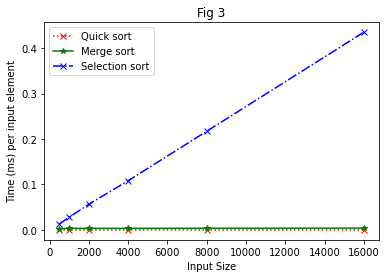

In [12]:
#%% Q3c. plot running time per input element (Fig 3)

##########################
# replace this block
plt.close()
plt.figure() #figure out plt.plot for a, start time might be wrong, markers might be x or *
res2 = [i/j for i,j in zip(quick_sort_time, sizes)]
plt.plot(sizes,res2,label = 'Quick sort', color='red', marker='x',linestyle=':')
res = [i/j for i,j in zip(merge_sort_time, sizes)]
plt.plot(sizes, res, label = 'Merge sort', color='green', marker='*',linestyle='solid')
res1 = [i/j for i,j in zip(selection_sort_time, sizes)]
plt.plot(sizes,res1,label = 'Selection sort', color='blue', marker='x',linestyle='-.')
plt.legend()
plt.title('Fig 3')
plt.ylabel('Time (ms) per input element')
plt.xlabel("Input Size")
plt.show()    
##########################


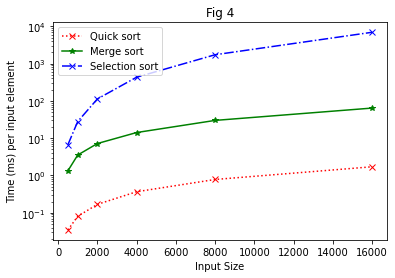

In [13]:


#%% Q3d. plot running time per input element (Fig 4)

##########################
# replace this block
#pass     
plt.figure() #figure out plt.plot for a, start time might be wrong, markers might be x or *
plt.plot(sizes,quick_sort_time, color='red', marker='x',linestyle=':', label = "Quick sort")
plt.plot(sizes, merge_sort_time, color='green', marker='*',linestyle='solid', label = "Merge sort")
plt.plot(sizes,selection_sort_time, color='blue', marker='x',linestyle='-.', label = "Selection sort")
plt.title('Fig 4')
plt.yscale('log')
plt.legend(loc ='upper left')
plt.ylabel('Time (ms) per input element')
plt.xlabel("Input Size")
plt.show() 
##########################